In [13]:
#from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *

import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from libs.InteractivePitchUI import InteractivePitch, PitchDisplay

from mplsoccer import *
import pandas as pd
import numpy as np
import os
# Click player into the pitch and take those player and apply Ripleys K to them. And then maybe PCA


In [14]:
# Step 6: Extract match data from tracking data
data = compile_team_tracking_data("data", "Denmark")
print(data.head())
one_match = extract_one_match(data, 1)


   Time [s]_team half_team  minute_team  Period_team   home_6_x  home_6_y  \
0           0.00        1H            0            1  18.863983  6.937420   
1           0.04        1H            0            1  18.860191  6.943985   
2           0.08        1H            0            1  18.856722  6.951682   
3           0.12        1H            0            1  18.853645  6.960831   
4           0.16        1H            0            1  18.851160  6.971420   

   home_18_x  home_18_y   home_1_x  home_1_y  ...  away_16_x  away_16_y  \
0  16.191383  27.790174  52.532173 -0.016596  ...        NaN        NaN   
1  16.196404  27.782358  52.532738 -0.013765  ...        NaN        NaN   
2  16.200035  27.776085  52.534679 -0.010368  ...        NaN        NaN   
3  16.201321  27.769873  52.537842 -0.006824  ...        NaN        NaN   
4  16.199764  27.763958  52.543060 -0.003730  ...        NaN        NaN   

   away_25_x  away_25_y  home_26_x  home_26_y  away_3_x  away_3_y  away_15_x  \
0     

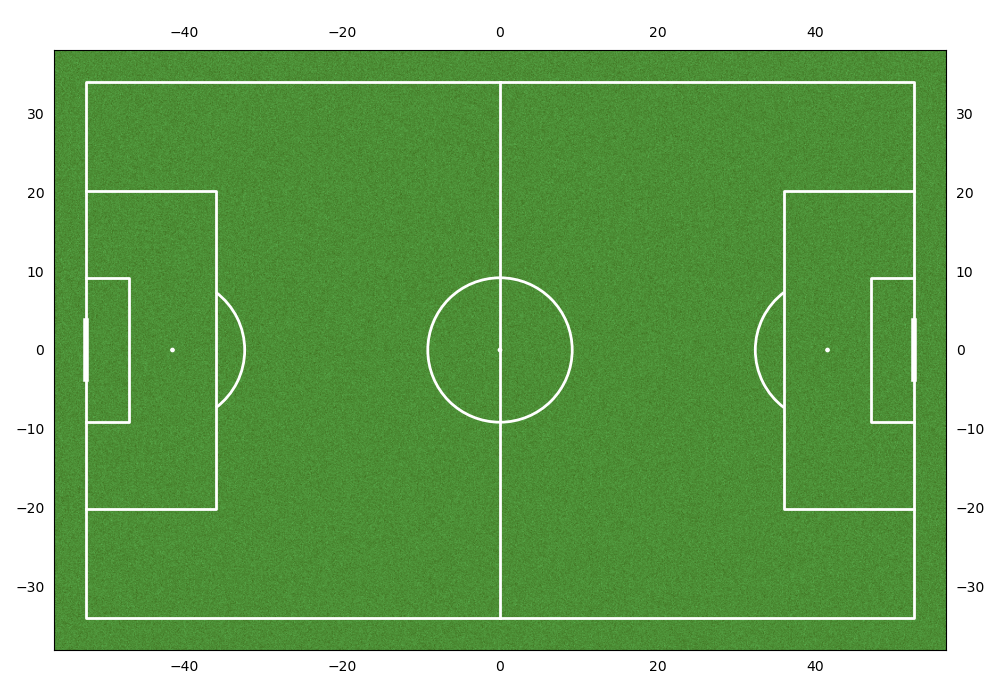

Ball placement mode enabled. Click to place the ball on the pitch.
Ball placed at: (-42.2967963719838, -0.280146199235503)
Vector drawing mode enabled. Select start and end points for the vector.
Situation saved! Total saved situations: 1
Cleared the current situation. All players are available for selection again.
Loaded Situation 1
{'home_1_x': -42.04337790200398, 'home_1_y': -0.026727729255682675, 'home_2_x': -25.064340413356156, 'home_2_y': 19.106366754220602, 'home_3_x': -26.33143276325525, 'home_3_y': 3.141003145492043, 'home_4_x': -22.403446478568064, 'home_4_y': -15.738672868004418, 'home_5_x': -7.83188445472851, 'home_5_y': 29.369814788403247, 'home_6_x': -8.592139864667963, 'home_6_y': 5.928606315270045, 'home_7_x': -5.170990519940418, 'home_7_y': -9.149792648529143, 'home_8_x': -6.944919809799146, 'home_8_y': -2.054075489094231, 'home_9_x': 2.431563579454128, 'home_9_y': 25.82195620868579, 'home_10_x': 2.558272814444045, 'home_10_y': 12.517486534745323, 'home_11_x': 8.260188

TypeError: InteractivePitch.calculate_wasserstein.<locals>.<lambda>() takes 1 positional argument but 2 were given

{'home_1_x': -42.04337790200398, 'home_1_y': -0.026727729255682675, 'home_2_x': -25.064340413356156, 'home_2_y': 19.106366754220602, 'home_3_x': -26.33143276325525, 'home_3_y': 3.141003145492043, 'home_4_x': -22.403446478568064, 'home_4_y': -15.738672868004418, 'home_5_x': -7.83188445472851, 'home_5_y': 29.369814788403247, 'home_6_x': -8.592139864667963, 'home_6_y': 5.928606315270045, 'home_7_x': -5.170990519940418, 'home_7_y': -9.149792648529143, 'home_8_x': -6.944919809799146, 'home_8_y': -2.054075489094231, 'home_9_x': 2.431563579454128, 'home_9_y': 25.82195620868579, 'home_10_x': 2.558272814444045, 'home_10_y': 12.517486534745323, 'home_11_x': 8.260188388989953, 'home_11_y': -0.280146199235503, 'ball_x_team': -42.2967963719838, 'ball_y_team': -0.280146199235503}
        match_id  Time [s]  Time [s]_team half_team  minute_team  Period_team  \
2008           1     80.32          80.32        1H            1            1   
2009           1     80.36          80.36        1H          

In [15]:
%matplotlib widget

interactive_pitch = InteractivePitch(one_match)


In [21]:
index_displayer = PitchDisplay(one_match,interactive_pitch.similar_situation_indices)

In [25]:
from libs.similar_movement import *
distance_index_list = find_similar_movement(one_match, index_displayer.get_selected_index(), interactive_pitch.similar_situation_indices )

In [26]:
print(distance_index_list)

[(402.41578262068566, 44047), (370.4059391468213, 38547), (390.20234023154035, 44095), (414.94708675071934, 227), (344.1938724228744, 48398), (425.884703860625, 56913), (376.816874869977, 57009), (419.52733450208814, 35283), (397.119913408081, 56961), (404.5954335716487, 33456), (425.0797411718993, 275), (400.0093214793402, 38499), (350.87544551817626, 38595), (396.5751933609265, 56865), (0.0, 143016), (399.35203379711777, 38451), (351.13277932689573, 48350), (104.72728740361427, 127046), (270.0453808319744, 89588), (377.48441993138, 371), (430.0031727263826, 141912), (494.58658070685635, 119641), (430.0100382070612, 141960), (430.00259278364894, 141864), (430.0033401583581, 142008), (430.0234833069371, 142056), (423.69558699595666, 323), (430.0277167221973, 141816), (430.00613936092134, 142104), (429.91167638034517, 141768), (430.0169749567004, 142152), (429.94565619516175, 141720), (430.0061314629403, 142200), (430.0104557336987, 142392), (430.00601777539873, 142440), (430.0067910670

In [27]:
distance_index_list = sorted(distance_index_list, key = lambda x : x[0])

In [28]:
index_displayer_2 = PitchDisplay(one_match, [index for (_,index) in distance_index_list])

In [29]:
generate_pitch_with_vectors(one_match.loc[143016:143016+1],"Goal-kick-for-report")